In [5]:
import tensorflow as tf
import os

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [7]:
Cpus = tf.config.experimental.list_physical_devices('CPU')

In [8]:
(Cpus)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
import cv2
import imghdr

In [10]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [16]:
data_dir = 'data'

In [17]:
os.listdir(data_dir)

['happy', 'sad']

In [18]:
image_exst = ['jpeg', 'jpg', 'bmp', 'png']

In [19]:
for img_cls in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, img_cls)):
        img_path = os.path.join(data_dir, img_cls, image)
        try:
            img =  cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in image_exst:
                print('Image is ont in the ext list {}'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Issue with image {}'.format(img_path))

In [20]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [72]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [78]:
data_itr = data.as_numpy_iterator()

In [79]:
batch = data_itr.next()

In [80]:
len(batch)

2

In [81]:
batch[0].shape

(32, 256, 256, 3)

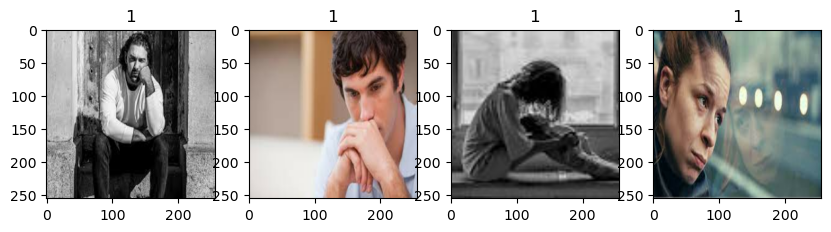

In [82]:
fig, ax = plt.subplots(ncols = 4, figsize=(10,10))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    
    ax[idx].title.set_text(batch[1][idx])

In [28]:
# Sad = 1
# Happy = 0

In [29]:
data = data.map(lambda x,y: (x/255, y))

In [30]:
scaled_itr = data.as_numpy_iterator()

In [31]:
batch = scaled_itr.next()

In [32]:
batch[0].min()

0.0

In [33]:
len(data)

10

In [34]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [35]:
train_size

7

In [36]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [37]:
len(train)

7

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import BinaryCrossentropy

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [41]:
model.compile(optimizer = 'adam', loss = BinaryCrossentropy(), metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [43]:
logdir = 'logs'

In [44]:
tf_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [45]:
hist = model.fit(train, epochs = 50, validation_data = val, callbacks = [tf_callback])

Epoch 1/50
7/7 [==============================] - 9s 907ms/step - loss: 0.9109 - accuracy: 0.5223 - val_loss: 0.6743 - val_accuracy: 0.5156
Epoch 2/50
7/7 [==============================] - 6s 742ms/step - loss: 0.6446 - accuracy: 0.6384 - val_loss: 0.6006 - val_accuracy: 0.7656
Epoch 3/50
7/7 [==============================] - 7s 932ms/step - loss: 0.5585 - accuracy: 0.7277 - val_loss: 0.5656 - val_accuracy: 0.8594
Epoch 4/50
7/7 [==============================] - 8s 920ms/step - loss: 0.5032 - accuracy: 0.7991 - val_loss: 0.3870 - val_accuracy: 0.8125
Epoch 5/50
7/7 [==============================] - 8s 972ms/step - loss: 0.3564 - accuracy: 0.8527 - val_loss: 0.3846 - val_accuracy: 0.8594
Epoch 6/50
7/7 [==============================] - 9s 1s/step - loss: 0.3340 - accuracy: 0.8482 - val_loss: 0.5125 - val_accuracy: 0.7812
Epoch 7/50
7/7 [==============================] - 8s 979ms/step - loss: 0.4792 - accuracy: 0.7812 - val_loss: 0.3303 - val_accuracy: 0.9375
Epoch 8/50
7/7 [=======

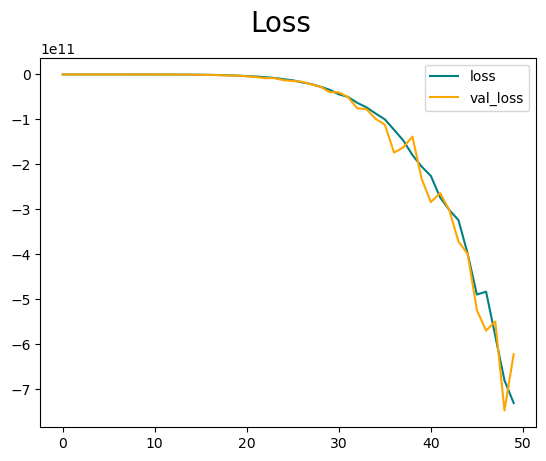

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
plt.suptitle('Loss', fontsize = 20)
plt.legend()
plt.show()

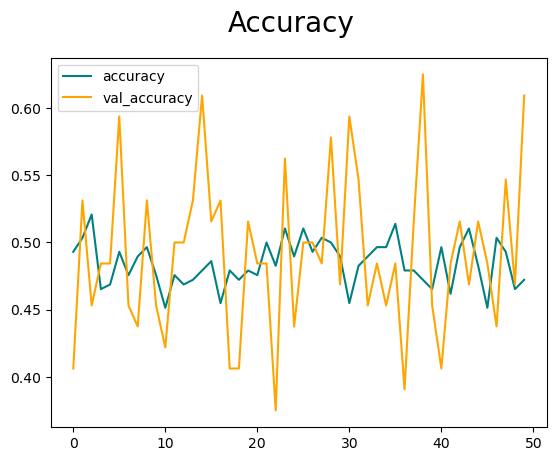

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
plt.suptitle('Accuracy', fontsize = 20)
plt.legend()
plt.show()

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
prec = Precision()
rec = Recall()
bir = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator():
    x, y = batch
    pred = model.predict(x)
    prec.update_state(y, pred)
    rec.update_state(y, pred)
    bir.update_state(y, pred)

1/1 [==============================] - 0s 203ms/step


In [49]:
print(f'Precision:{prec.result().numpy()},Recall:{rec.result().numpy()}, Accuracy:{bir.result().numpy()}')

Precision:1.0,Recall:1.0, Accuracy:1.0


In [89]:
img = cv2.imread('sad.jpg')

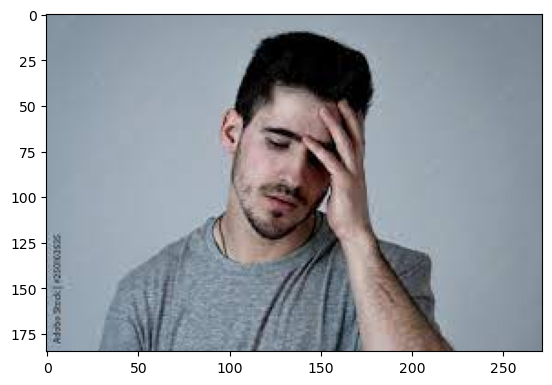

In [90]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

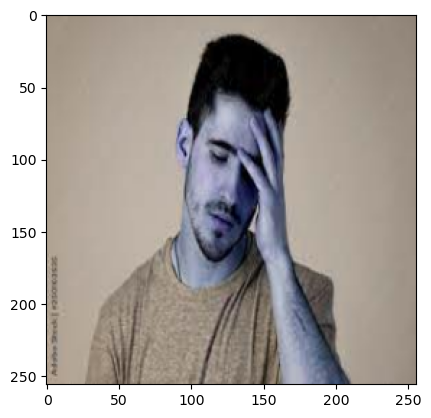

In [91]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [92]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 436ms/step


In [93]:
yhat

array([[0.99995273]], dtype=float32)

In [94]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
